In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Rock, Paper, Scissors
])


In [2]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Perform data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    'validation',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)


Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Epoch 1/10
79/79 [==============================] - 147s 2s/step - loss: 1.2596 - accuracy: 0.4460
Epoch 2/10
79/79 [==============================] - 142s 2s/step - loss: 0.5878 - accuracy: 0.7369
Epoch 3/10
79/79 [==============================] - 138s 2s/step - loss: 0.3894 - accuracy: 0.8579
Epoch 4/10
79/79 [==============================] - 138s 2s/step - loss: 0.3276 - accuracy: 0.8802
Epoch 5/10
79/79 [==============================] - 135s 2s/step - loss: 0.3014 - accuracy: 0.9024
Epoch 6/10
79/79 [==============================] - 135s 2s/step - loss: 0.2232 - accuracy: 0.9230
Epoch 7/10
79/79 [==============================] - 136s 2s/step - loss: 0.1752 - accuracy: 0.9377
Epoch 8/10
79/79 [==============================] - 138s 2s/step - loss: 0.2010 - accuracy: 0.9349
Epoch 9/10
79/79 [==============================] - 136s 2s/step - loss: 0.1641 - accuracy: 0.9472
Epoch 10/10
79/79 [=========

In [4]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)


Found 372 images belonging to 3 classes.
12/12 [==============================] - 4s 351ms/step - loss: 0.3595 - accuracy: 0.8253
Test accuracy: 0.8252688050270081


Predicted class: rock


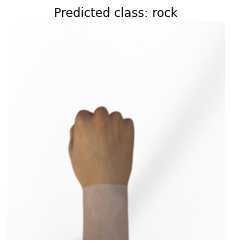

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = 'test/rock/testrock04-16.png'
img = image.load_img(img_path, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Mapping of class indices to class labels
class_labels = ['scissors', 'rock', 'paper']  # Replace with your class labels

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print("Predicted class:", predicted_class_label)
plt.imshow(img)
plt.title("Predicted class: " + predicted_class_label)
plt.axis('off')
plt.show()